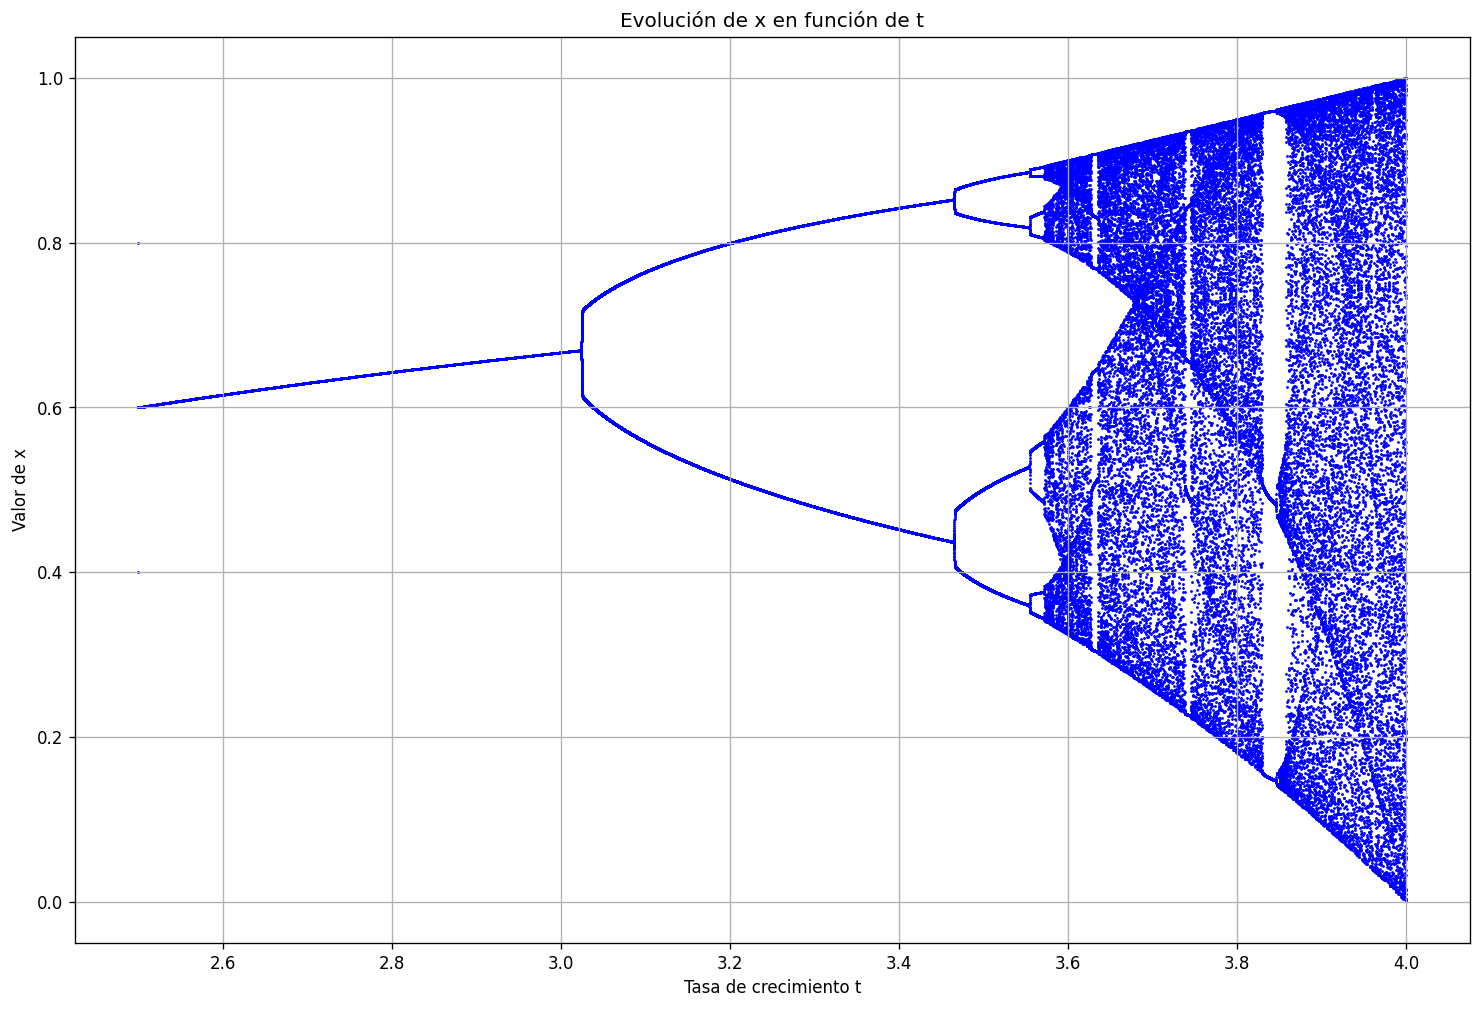

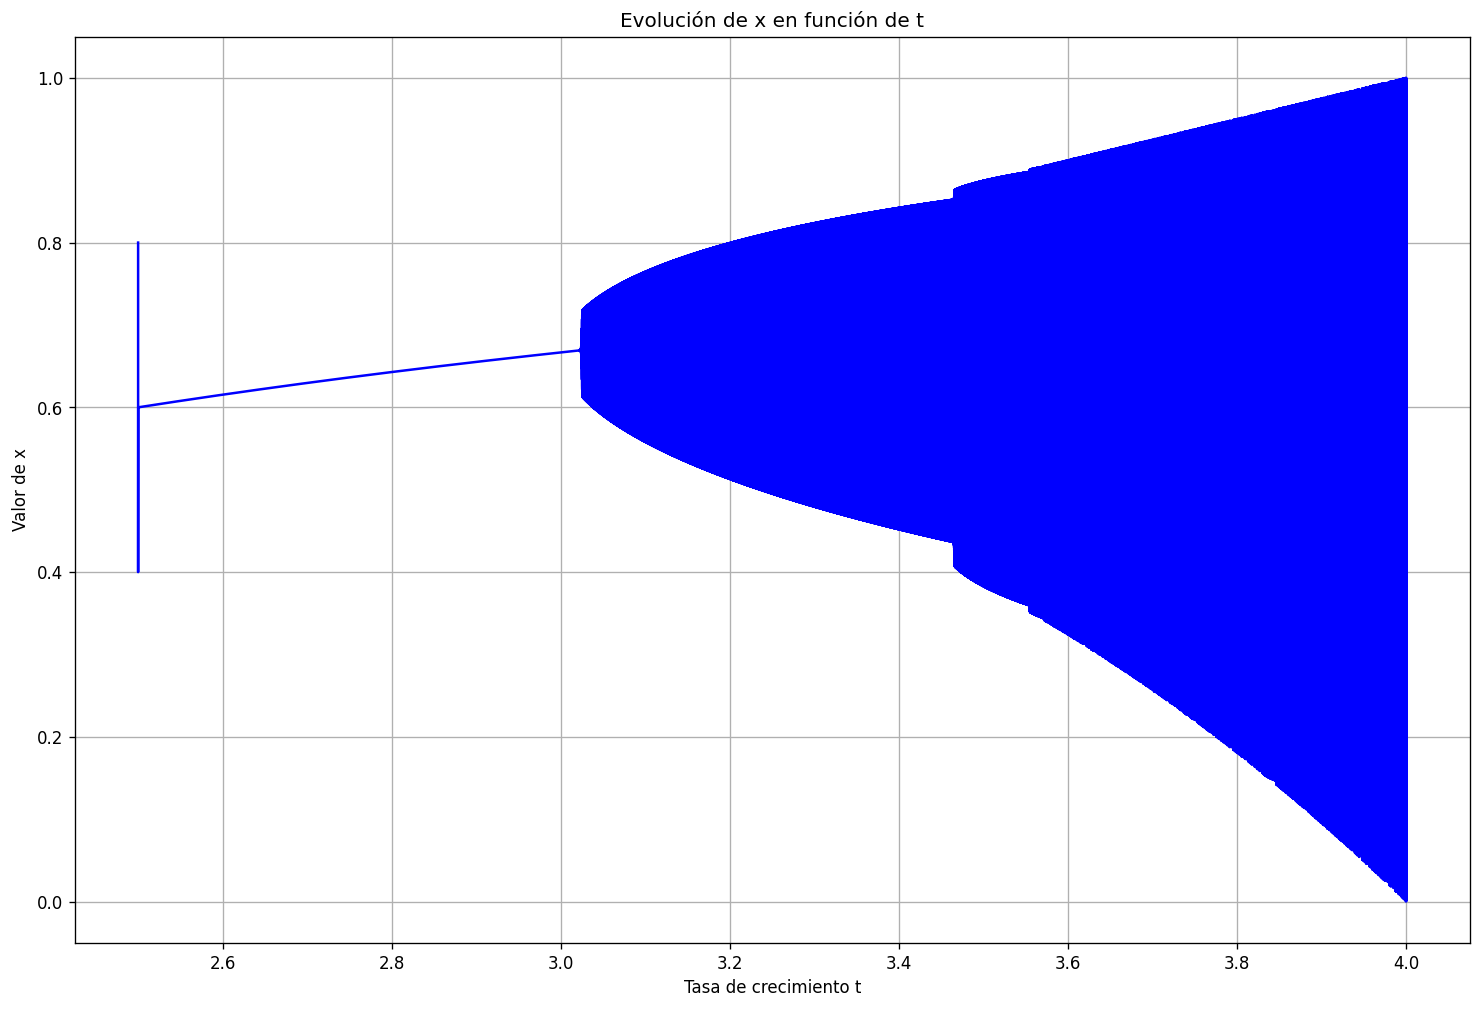

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def feigenbaum(X0, t0, tam_paso, n_pasos, y0=0):
    """
    Calcula los valores del modelo logístico utilizando una aproximación del diagrama de bifurcación de Feigenbaum.
    
    Args:
        X0 (float): Condición inicial de la población.
        t0 (float): Tasa de crecimiento inicial.
        tam_paso (float): Incremento de la tasa de crecimiento en cada paso.
        n_pasos (int): Número de pasos en la simulación.
        y0 (float, opcional): Valor inicial para Y. Default a 0.
    
    Returns:
        tuple of np.ndarray: Arrays de X, T, Y a lo largo del tiempo.
    """
    X = np.zeros(n_pasos)
    T = np.linspace(t0, t0 + tam_paso * (n_pasos - 1), n_pasos)
    Y = np.zeros(n_pasos)
    X[0], Y[0] = X0, y0

    for i in range(1, n_pasos):
        X[i] = T[i] * X[i-1] * (1 - X[i-1])
    
    return X, T, Y

def graficar(x, t, plot_type='scatter', width=10, height=5, dpi=100):
    """
    Grafica los valores de x en función de t.

    Args:
        t (np.ndarray): Array de tasas de crecimiento.
        x (np.ndarray): Array de valores de x correspondientes a cada t.
        plot_type (str, opcional): Tipo de gráfico, 'scatter' o 'line'. Default a 'scatter'.
        width (int, opcional): Ancho de la figura en pulgadas. Default a 10.
        height (int, opcional): Altura de la figura en pulgadas. Default a 5.
        dpi (int, opcional): Resolución de la figura en puntos por pulgada. Default a 100.
    """
    plt.figure(figsize=(width, height), dpi=dpi)
    if plot_type == 'scatter':
        plt.scatter(t, x, color='blue', s=0.5)
    elif plot_type == 'line':
        plt.plot(t, x, color='blue')
    plt.title('Evolución de x en función de t')
    plt.xlabel('Tasa de crecimiento t')
    plt.ylabel('Valor de x')
    plt.grid(True)
    plt.show()

# Ejemplo de uso de las funciones
x0, r0, tam_paso, n_pasos = 0.8, 2.5, 0.00001, 150000
arrayX, arrayT, arrayY = feigenbaum(x0, r0, tam_paso, n_pasos)

# Graficar como diagrama de bifurcación (puntos) con tamaño personalizado
graficar(arrayX, arrayT, plot_type='scatter', width=15, height=10, dpi=120)

# Graficar como evolución del sistema (líneas) con tamaño personalizado
graficar(arrayX, arrayT, plot_type='line', width=15, height=10, dpi=120)


In [2]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

def feigenbaum(x0, r0, tam_paso, n_pasos, y0=0):
    valores_x = np.zeros(n_pasos)
    valores_r = np.linspace(r0, r0 + tam_paso * (n_pasos - 1), n_pasos)
    Y = np.zeros(n_pasos)
    valores_x[0], Y[0] = x0, y0

    for i in range(1, n_pasos):
        valores_x[i] = valores_r[i] * valores_x[i-1] * (1 - valores_x[i-1])
    
    return valores_x, valores_r, Y

def graficar(x, t, plot_type='scatter', width=15, height=10, dpi=120, save_as_pdf=False, filename='figure.pdf'):
    """
    Crea un gráfico interactivo utilizando Plotly y opcionalmente lo guarda como PDF.

    Args:
        x (np.ndarray): Array de valores de x correspondientes a cada t.
        t (np.ndarray): Array de tasas de crecimiento.
        plot_type (str, opcional): Tipo de gráfico, 'scatter' o 'line'. Default a 'scatter'.
        width (int, opcional): Ancho de la figura en pulgadas. Default a 10.
        height (int, opcional): Altura de la figura en pulgadas. Default a 5.
        dpi (int, opcional): Resolución de la figura en puntos por pulgada. Default a 100.
        save_as_pdf (bool, opcional): Si es True, guarda la gráfica como PDF. Default a False.
        filename (str, opcional): Nombre del archivo PDF. Default a 'figure.pdf'.
    """
    fig = go.Figure()
    if plot_type == 'scatter':
        fig.add_trace(go.Scatter(x=t, y=x, mode='markers', marker=dict(size=1, color='blue')))
    elif plot_type == 'line':
        fig.add_trace(go.Scatter(x=t, y=x, mode='lines', line=dict(color='blue')))
    fig.update_layout(title='Diagrama de bifurcación de Feigenbaum',
                      xaxis_title='Tasa de crecimiento t',
                      yaxis_title='Valor de x',
                      width=width*100,  # Convertido de pulgadas a píxeles aproximadamente
                      height=height*100)

    if save_as_pdf:
        pio.write_image(fig, filename, format='pdf')
    fig.show()

# Parámetros de la simulación
X0, t0, tam_paso, n_pasos = 0.8, 2.5, 0.00001, 150000
arrayX, arrayT, arrayY = feigenbaum(X0, t0, tam_paso, n_pasos)

# Graficar y guardar como PDF
graficar(arrayX, arrayT, plot_type='scatter', width=15, height=10, dpi=120, save_as_pdf=True, filename='bifurcation_diagram.pdf')
